<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [11]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [15]:
df['species'] = df['species'].str.lower()
df['species'] = df['species'].str.strip()
df['species'].fillna("default",inplace = True)
print(f" La cantidad de elementos de la columna 'species' es {len(df['species'].unique())}")

 La cantidad de elementos de la columna 'species' es 4


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

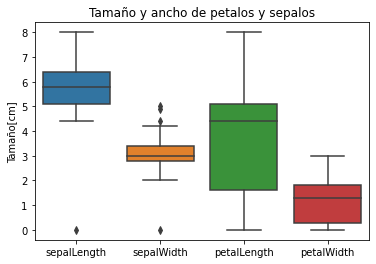

In [18]:
df = df.fillna(0.0)
sns.boxplot(data=df)
plt.title('Tamaño y ancho de petalos y sepalos')
plt.ylabel('Tamaño[cm]')
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [23]:
rango_df = len(df)
Label = []
for k in range(rango_df):
  if 4.0<=df['sepalLength'][k]<=7.0 and 2.0<=df['sepalWidth'][k]<=4.5 and 1.0<=df['petalLength'][k]<=7.0 and 0.1<=df['petalWidth'][k]<=2.5:
    Label.append("Valido") 
  else:
    Label.append("No valido") 
df["label"]=Label
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,No valido
1,7.2,3.6,6.1,2.5,virginica,No valido
2,6.3,3.3,6.0,2.5,virginica,Valido
3,6.7,3.3,5.7,2.5,virginica,Valido
4,6.3,3.4,5.6,2.4,virginica,Valido
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,Valido
146,4.8,3.0,1.4,0.1,setosa,Valido
147,4.9,3.1,1.5,0.1,setosa,Valido
148,4.9,3.6,1.4,0.1,setosa,Valido


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

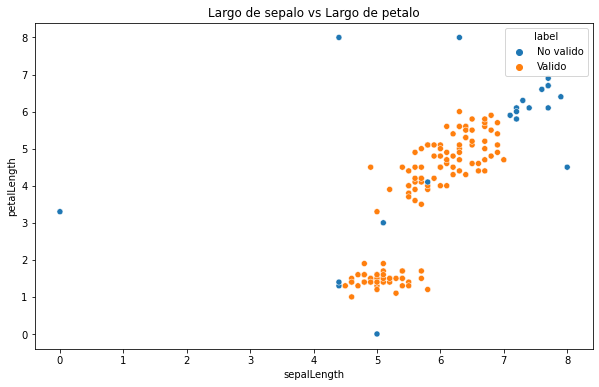

In [24]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='sepalLength',y='petalLength',hue='label',data=df,)
plt.title('Largo de sepalo vs Largo de petalo')
plt.show()

La mayoria de los datos estan entre los rangos validos del experimento, y ademas, los datos que no son validos estan, en su mayoria, en la parte superior derecha.

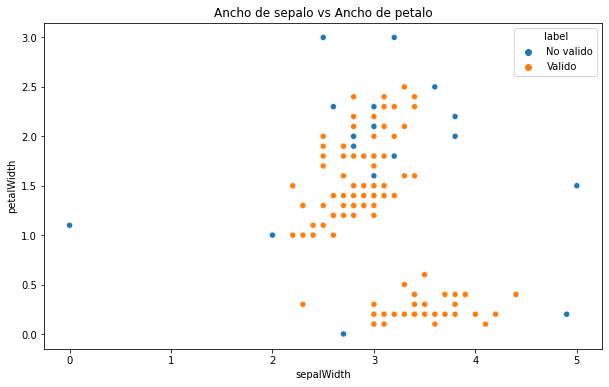

In [25]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='sepalWidth',y='petalWidth',hue='label',data=df,)
plt.title('Ancho de sepalo vs Ancho de petalo')
plt.show()

La mayoria de los datos son validos, y los datos no validos estan dispersos, en su mayoria, en la parte superior del grafico

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

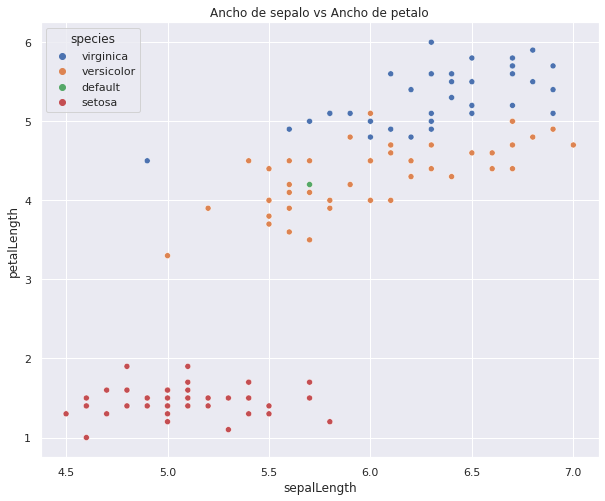

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
df_specie=df.loc[df['label']=='Valido']
sns.scatterplot(x='sepalLength',y='petalLength',data=df_specie,hue='species',)
plt.title('Ancho de sepalo vs Ancho de petalo')
plt.show()